In [1]:
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 93.7 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3


Model page: https://huggingface.co/Salesforce/blip2-opt-2.7b

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/Salesforce/blip2-opt-2.7b)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-text-to-text", model="Salesforce/blip2-opt-2.7b")

2025-05-27 10:50:08.825373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748343009.057189     184 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748343009.119611     184 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [1]:
# Load model directly
from transformers import AutoProcessor, AutoModelForVisualQuestionAnswering

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = AutoModelForVisualQuestionAnswering.from_pretrained("Salesforce/blip2-opt-2.7b")

2025-05-27 11:38:27.374884: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748345907.618399     255 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748345907.678482     255 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

GPU Available: True
GPU Name: Tesla T4


In [56]:
from PIL import Image
import os

# Folder where your images are uploaded
train_image_folder = "/kaggle/input/train-1"
test_image_folder = "/kaggle/input/test-1"

# List of image filenames
train_image_filenames = [
    "Bagels.jpg",
    "Coffee Cake.jpg",
    "Fish Tacos.jpg",
    "Hot Honey Baked Beans.jpg",
    "Kheer (Rice Pudding).jpg",
    "Marry Me Chickpeas.jpg",
    "burger.jpg",
    "paneer tikka masala.jpg",
    "pasta.jpg",
    "sandwich.jpg"
]

test_image_filenames = [
    "Cabbage Stir Fry.jpg",
    "Fried Noodles.jpg",
    "burrito.jpg",
    "chicken bites.jpg",
    "steamed buns.jpg"
]
# Load all images
train_images = [Image.open(os.path.join(train_image_folder, fname)).convert("RGB") for fname in train_image_filenames]
test_images = [Image.open(os.path.join(test_image_folder, fname)).convert("RGB") for fname in test_image_filenames]

In [131]:
from PIL import Image
import os
test_image_folder = "/kaggle/input/test-1"
test_image_filenames = [
    "Cabbage Stir Fry.jpg",
    "Fried Noodles.jpg",
    "burrito.jpg",
    "chicken bites.jpg",
    "steamed buns.jpg"
]
test_images = [Image.open(os.path.join(test_image_folder, fname)).convert("RGB") for fname in test_image_filenames]

In [65]:
# from IPython.display import display

# for img in train_images:
#     display(img)

In [3]:
import json

# Load your JSON
with open("/kaggle/input/recipe-summary/Train.json") as f:
    train_data = json.load(f)

with open("/kaggle/input/recipe-summary/Test.json") as f:
    test_data = json.load(f)

In [4]:
print(train_data["Few_Shots_Examples"][0])
print("-" * 150)
print(test_data["test_data"][0])

{'input': {'image': '/kaggle/input/train-1/pasta.jpg', 'title': 'Cheesy Twists'}, 'output': {'summary': {'Ingredients': ['1 (1 lb) box penne or penne rigate', '2 tablespoons butter or margarine', '2 garlic cloves, minced', '2 tablespoons flour', '3/4 cup chicken broth or beef broth', '3/4 cup milk', '2 teaspoons parsley flakes', 'Salt and pepper, to taste', '1/3 cup grated Parmesan cheese'], 'Instructions': ['Melt butter in a pan and sauté garlic until fragrant', 'Stir in flour to form a roux, then gradually add broth and milk while stirring', 'Cook the sauce until it thickens, then add seasonings and Parmesan', 'Mix the sauce with hot pasta and serve immediately']}}}
------------------------------------------------------------------------------------------------------------------------------------------------------
{'input': {'image': '/kaggle/input/test-1/Cabbage Stir Fry.jpg', 'title': 'Fried Cabbage'}, 'output': {'summary': {'Ingredients': ['1 tablespoon vegetable oil', '2 cloves g

In [10]:
# !pip install -U langchain-community
# !pip install transformers torch nltk rouge-score

In [100]:
SYSTEM_PROMPT = """
You are a world-class culinary expert and recipe generator with exceptional skills in analyzing both images and text. 
Your role is to generate detailed, precise, and easy-to-follow cooking recipes based solely on a food item's image and its title.

When given an image and title, you will:

1. Observe the image carefully and identify visible ingredients, textures, and cooking styles.
2. Use the title to understand the cuisine type, dish category, and possible variations.
3. Think step-by-step about what ingredients would logically be included, considering common cooking methods for that dish.
4. Curate a relevant list of ingredients required to cook the item. 
5. While generating the summary of the cooking recipe,break down the cooking process into clear, sequential instructions, ensuring clarity and precision.
6. Provide the final output recipe as two distinct sections: Ingredients and Instructions.
"""

FEW_SHOT_EXAMPLES = train_data["Few_Shots_Examples"]

In [62]:
# import random

# # Select 5 random unique indices from 0 to 10 (inclusive)
# indices = random.sample(range(len(TOTAL_EXAMPLES)), 4)

# # Pick the examples using those indices
# FEW_SHOT_EXAMPLES = [TOTAL_EXAMPLES[i] for i in indices]

In [101]:
# Used in main function 
image = []    
for i in range(len(FEW_SHOT_EXAMPLES)):
    image_path = FEW_SHOT_EXAMPLES[i]['input']['image']
    image.append(Image.open(image_path))

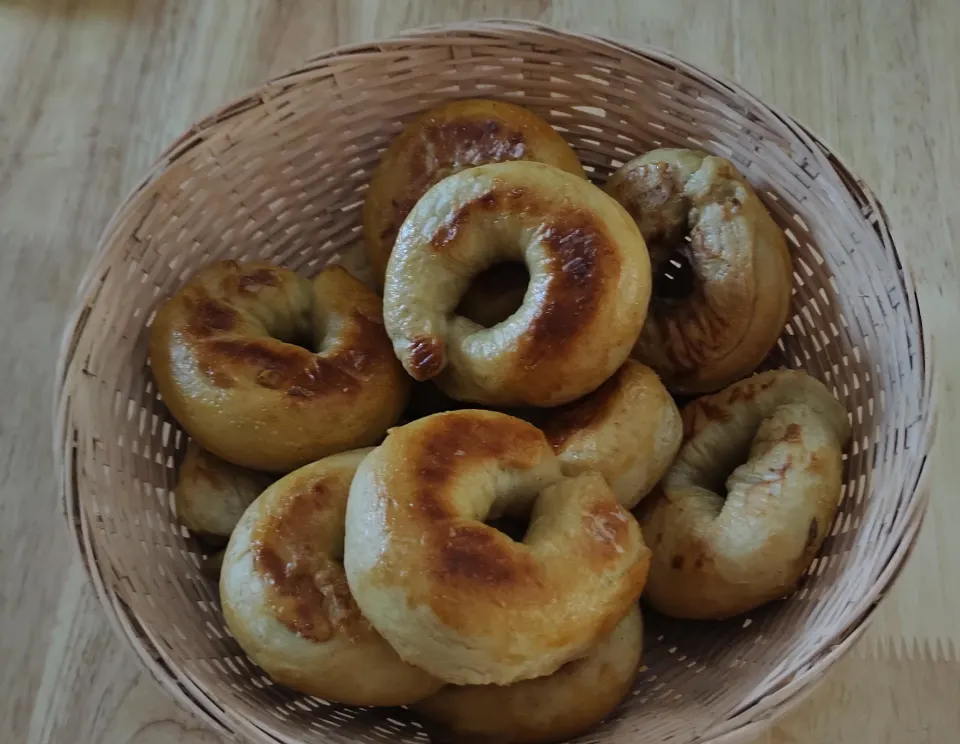

In [71]:
image[0]

In [72]:
# from PIL import Image
# img = []
# img_train = []
# for i in range(len(FEW_SHOT_EXAMPLES)) :
#     img.append(FEW_SHOT_EXAMPLES[i]['input']['image'])
# for path in img :
#     img_train.append(Image.open(path))

# Examples = []

# for i in range(len(FEW_SHOT_EXAMPLES)):
#     example = {
#         "image": img_train[i],  # PIL image
#         "title": FEW_SHOT_EXAMPLES[i]['input']['title'],
#         "output": FEW_SHOT_EXAMPLES[i]['output']
#     }
#     Examples.append(example)
    
# Examples[0]

In [73]:
# from langchain.memory import ConversationBufferMemory
# from langchain.prompts import PromptTemplate
# from langchain.chains import LLMChain
# from langchain import HuggingFacePipeline

# # Create memory for storing conversation history
# memory = ConversationBufferMemory(
#     memory_key="chat_history",
#     return_messages=True
# )

# memory.chat_memory.add_user_message(SYSTEM_PROMPT)

# # Create the prompt template with memory
# prompt_template = PromptTemplate(
#     input_variables=["image", "title", "chat_history"],
#     template= f"""
#                  {{chat_history}}
                
#                  Below are some examples on what the input and output looks like, 
#                  you will be given the input image and text and you have to generate the output in the format as shown below : \n 
#                  {{Examples}}
                
#                  Input Image: {{image}}
#                  Title: {{title}}
                
#                  Output:
#              """
# )

# def create_pipeline(model, processor):
#     """Create a pipeline assuming BLIP2-style processor."""
    
#     def process_inputs(image, text):
#         return processor(images=image, text=text, return_tensors="pt")
    
#     return HuggingFacePipeline(
#         pipeline=model,
#         model_kwargs={
#             "temperature": 0.7,
#             "process_inputs": process_inputs
#         }
#     )

# # Create LangChain pipelines for both models
# blip2_pipeline = create_pipeline(model, processor)

# # Initialize LLM chain with prompt and memory
# blip2_chain = LLMChain(
#     llm=blip2_pipeline,
#     prompt=prompt_template,
#     memory=memory,
#     verbose=True
# )

In [74]:
import json
from typing import Dict, List
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [102]:
FEW_SHOT_EXAMPLES[0]['input']['title']

'Cheesy Twists'

In [103]:
title_examples = []
output_examples = []

for i in range(len(FEW_SHOT_EXAMPLES)) :
    title_examples.append(FEW_SHOT_EXAMPLES[i]['input']['title'])
    output_examples.append(FEW_SHOT_EXAMPLES[i]['output'])

In [106]:
output_examples[0]

{'summary': {'Ingredients': ['1 (1 lb) box penne or penne rigate',
   '2 tablespoons butter or margarine',
   '2 garlic cloves, minced',
   '2 tablespoons flour',
   '3/4 cup chicken broth or beef broth',
   '3/4 cup milk',
   '2 teaspoons parsley flakes',
   'Salt and pepper, to taste',
   '1/3 cup grated Parmesan cheese'],
  'Instructions': ['Melt butter in a pan and sauté garlic until fragrant',
   'Stir in flour to form a roux, then gradually add broth and milk while stirring',
   'Cook the sauce until it thickens, then add seasonings and Parmesan',
   'Mix the sauce with hot pasta and serve immediately']}}

In [159]:
def calculate_bleu_score(reference: str, candidate: str) -> float:
    """Calculate BLEU score between reference and candidate text."""
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())
    smoothing = SmoothingFunction().method1
    return sentence_bleu([reference_tokens], candidate_tokens, smoothing_function=smoothing)

def calculate_rouge_scores(reference: str, candidate: str) -> Dict[str, float]:
    """Calculate ROUGE scores between reference and candidate text."""
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, candidate)
    return {
        'rouge1': scores['rouge1'].fmeasure,
        'rouge2': scores['rouge2'].fmeasure,
        'rougeL': scores['rougeL'].fmeasure
    }

def generate_recipe(image: Image.Image, title: str) -> Dict:
    """Generate recipe using BLIP2 model with few-shot prompting."""
    try:
        import json
        
        # Load your JSON
        with open("/kaggle/input/recipe-summary/Train.json") as f:
            train_data = json.load(f)
        
        with open("/kaggle/input/recipe-summary/Test.json") as f:
            test_data = json.load(f)

        SYSTEM_PROMPT = """
                You are a world-class culinary expert and recipe generator with exceptional skills in analyzing both images and text. 
                Your role is to generate detailed, precise, and easy-to-follow cooking recipes based solely on a food item's image and its title.
                
                When given an image and title, you will:
                
                1. Observe the image carefully and identify visible ingredients, textures, and cooking styles.
                2. Use the title to understand the cuisine type, dish category, and possible variations.
                3. Think step-by-step about what ingredients would logically be included, considering common cooking methods for that dish.
                4. Curate a relevant list of ingredients required to cook the item. 
                5. While generating the summary of the cooking recipe,break down the cooking process into clear, sequential instructions, ensuring clarity and precision.
                6. Provide the final output recipe as two distinct sections: Ingredients and Instructions.
                """
        
        FEW_SHOT_EXAMPLES = train_data["Few_Shots_Examples"]
        title_examples = []
        output_examples = []
        
        for i in range(len(FEW_SHOT_EXAMPLES)) :
            title_examples.append(FEW_SHOT_EXAMPLES[i]['input']['title'])
            output_examples.append(FEW_SHOT_EXAMPLES[i]['output'])



        
        
        # Compose prompt text for model input
        prompt = f""" {SYSTEM_PROMPT} \n\n 
        Below are some examples on what the input and output looks like, 
        you will be given the input image and title text {title_examples}
        and you have to generate the output in the format as shown below for each of the example : \n 
        {output_examples}
        Now , For the given Input Image and Title : {title} , Give the Recipe Summary Output
                  
                  """
        target_image = image 
        # Process inputs (this uses your processor directly)
        inputs = processor(images=target_image, text=prompt, return_tensors="pt")
        
        # Generate recipe output
        outputs = model.generate(
            **inputs,
            max_length = 4096,
            num_beams=3,
            early_stopping=True
        )

        if outputs is None or len(outputs) == 0:
            raise ValueError("No output generated by model.")
    
        # Decode generated text output
        generated_text = processor.decode(outputs[0], skip_special_tokens=True)
        
        return {
            "blip2_recipe": generated_text
        }
    except Exception as e:
        print(f"Error generating recipe: {e}")
        return {
            "blip2_recipe": None,
            "error": str(e)
        }


def evaluate_recipe_generation(test_images: List[Image.Image], test_titles: List[str], reference_summaries: List[str]) -> (Dict[str, float], List[str]):
    """
    Evaluate recipe generation given lists of images, titles, and reference summaries.

    Returns:
    - metrics: Dictionary of average BLEU and ROUGE scores
    - generated_outputs: List of generated recipe strings
    """
    assert len(test_images) == len(test_titles) == len(reference_summaries), "Input lists must have the same length."

    total_bleu = 0.0
    total_rouge = {'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0}
    generated_outputs = []

    for i in range(len(test_images)):
        image = test_images[i]
        title = test_titles[i]
        reference = reference_summaries[i]

        result = generate_recipe(image=image, title=title)
        candidate = result.get("blip2_recipe")

        if candidate is None:
            generated_outputs.append("[FAILED TO GENERATE]")
            continue

        bleu = calculate_bleu_score(reference, candidate)
        rouge = calculate_rouge_scores(reference, candidate)

        total_bleu += bleu
        for key in total_rouge:
            total_rouge[key] += rouge[key]

        generated_outputs.append(candidate)

    n = len(test_images)
    avg_metrics = {
        "bleu": total_bleu / n,
        "rouge1": total_rouge['rouge1'] / n,
        "rouge2": total_rouge['rouge2'] / n,
        "rougeL": total_rouge['rougeL'] / n
    }

    return avg_metrics, generated_outputs

In [ ]:
def generate_recipe_2(image: Image.Image, title: str) -> Dict:
    """Generate recipe using BLIP2 model from image and title only, no prompt engineering."""
    try:
        # Just combine the title as simple text input for the model, no complex prompt
        inputs = processor(images=image, text=title, return_tensors="pt")

        outputs = model.generate(
            **inputs,
            max_length=4096,
            num_beams=3,
            early_stopping=True
        )

        if outputs is None or len(outputs) == 0:
            raise ValueError("No output generated by model.")

        generated_text = processor.decode(outputs[0], skip_special_tokens=True)

        return {
            "blip2_recipe": generated_text
        }
    except Exception as e:
        print(f"Error generating recipe: {e}")
        return {
            "blip2_recipe": None,
            "error": str(e)
        }

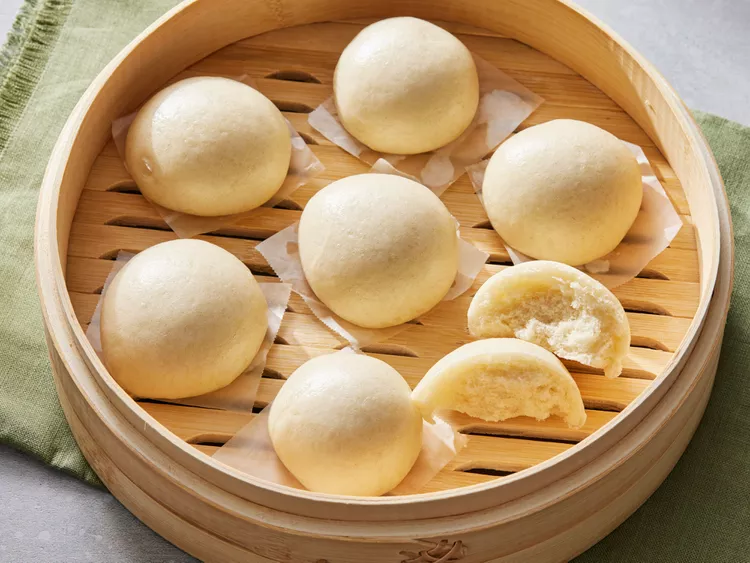

In [31]:
test_images[4]

In [32]:
# test_set = [
#     {
#         "input": {
#             "image": test_images[0],  # Cabbage Stir Fry.jpg
#             "title": "Fried Cabbage"
#         },
#         "output": {
#             "summary": {
#                 "Ingredients": [
#                     "1 tablespoon vegetable oil",
#                     "2 cloves garlic, minced",
#                     "1 pound shredded cabbage",
#                     "1 tablespoon soy sauce",
#                     "1 tablespoon Chinese cooking wine (Shaoxing wine)"
#                 ],
#                 "Instructions": [
#                     "Heat oil in a wok, add garlic, and cook for a few seconds until slightly browned",
#                     "Add shredded cabbage, stir to coat, cover, and cook for 1 minute",
#                     "Pour in soy sauce, stir for another minute, then add cooking wine and stir-fry until tender",
#                     "Serve hot and enjoy"
#                 ]
#             }
#         }
#     },
#     {
#         "input": {
#             "image": test_images[4],  # steamed buns.jpg
#             "title": "Fluffy Buns"
#         },
#         "output": {
#             "summary": {
#                 "Ingredients": [
#                     "1 ¾ cups all-purpose flour, divided",
#                     "¾ cup warm water, divided",
#                     "1 tablespoon active dry yeast",
#                     "1 teaspoon white sugar",
#                     "2 tablespoons white sugar",
#                     "1 tablespoon vegetable oil",
#                     "¼ teaspoon salt",
#                     "½ teaspoon baking powder"
#                 ],
#                 "Instructions": [
#                     "Mix 1/4 cup flour, 1/4 cup warm water, yeast, and 1 tsp sugar; let sit 30 mins",
#                     "Add remaining ingredients and knead to smooth dough; let rise until tripled",
#                     "Punch down, knead in baking powder, shape into 24 balls on wax paper squares",
#                     "Steam in batches for 15 mins; remove lid carefully to avoid water dripping on buns"
#                 ]
#             }
#         }
#     }
# ]


In [ ]:
# def main():
#     # Load test data
#     test_data = load_data('test.json')
    
#     # Evaluate the models
#     metrics = evaluate_recipe_generation(test_data)
    
#     # Print results
#     print("\nEvaluation Metrics:")
#     print(f"BLEU Score: {metrics['bleu']:.4f}")
#     print(f"ROUGE-1: {metrics['rouge1']:.4f}")
#     print(f"ROUGE-2: {metrics['rouge2']:.4f}")
#     print(f"ROUGE-L: {metrics['rougeL']:.4f}")

# if __name__ == "__main__":
#     main()


In [ ]:
# for data in test_data : 
# # Evaluate the model
#     metrics , generated_outputs = evaluate_recipe_generation(test_data)
    
#     # Print results
#     print(generated_outputs)
#     print("\nEvaluation Metrics:")
#     # print(metrics)
#     print(f"BLEU Score: {metrics['bleu']:.4f}")
#     print(f"ROUGE-1: {metrics['rouge1']:.4f}")
#     print(f"ROUGE-2: {metrics['rouge2']:.4f}")
#     print(f"ROUGE-L: {metrics['rougeL']:.4f}")

In [80]:
test_data['test_data'][0]['input']['image']

'/kaggle/input/test-1/Cabbage Stir Fry.jpg'

In [125]:
import json 
from PIL import Image 
with open("/kaggle/input/recipe-summary/Test.json") as f:
    test_data = json.load(f)
    
reference_summaries = []
for i in range(len(test_data)) :
    reference_summaries.append(test_data['test_data'][i]['output'])

In [160]:

def main():
    test_title = []
    # test_image = []
    import json 
    from PIL import Image 
    with open("/kaggle/input/recipe-summary/Test.json") as f:
        test_data = json.load(f)

    from PIL import Image
    import os
    test_image_folder = "/kaggle/input/test-1"
    test_image_filenames = [
        "Cabbage Stir Fry.jpg",
        "Fried Noodles.jpg",
        "burrito.jpg",
        "chicken bites.jpg",
        "steamed buns.jpg"
    ]
    test_images = [Image.open(os.path.join(test_image_folder, fname)).convert("RGB") for fname in test_image_filenames]

        
    reference_summaries = []
    for i in range(len(test_data['test_data'])) :
        reference_summaries.append(test_data['test_data'][i]['output'])
    
    # # Test data
    for i in range(len(test_data['test_data'])):
        test_title.append(test_data['test_data'][i]['input']['title'])
        # imgy = Image.open(test_data['test_data'][i]['input']['image'])
        # test_image.append(imgy)

    # print(len(test_images)) 
    # print(len(test_title)) 
    # print(len(reference_summaries))
        
    # Evaluate the model
    metrics , generated_outputs = evaluate_recipe_generation(test_images , test_title, reference_summaries )

    # Print results
    print(generated_outputs)
    print("\nEvaluation Metrics:")
    # print(metrics)
    print(f"BLEU Score: {metrics['bleu']:.4f}")
    print(f"ROUGE-1: {metrics['rouge1']:.4f}")
    print(f"ROUGE-2: {metrics['rouge2']:.4f}")
    print(f"ROUGE-L: {metrics['rougeL']:.4f}")

In [134]:
test_data['test_data'][0]

{'input': {'image': '/kaggle/input/test-1/Cabbage Stir Fry.jpg',
  'title': 'Fried Cabbage'},
 'output': {'summary': {'Ingredients': ['1 tablespoon vegetable oil',
    '2 cloves garlic, minced',
    '1 pound shredded cabbage',
    '1 tablespoon soy sauce',
    '1 tablespoon Chinese cooking wine (Shaoxing wine)'],
   'Instructions': ['Heat oil in a wok, add garlic, and cook for a few seconds until slightly browned',
    'Add shredded cabbage, stir to coat, cover, and cook for 1 minute',
    'Pour in soy sauce, stir for another minute, then add cooking wine and stir-fry until tender',
    'Serve hot and enjoy']}}}

In [135]:
# test_data['test_data'][0]['input']
for item in test_data : 
    print(item)

test_data


In [161]:
if __name__ == "__main__":
    main()

Error generating recipe: index out of range in self
Error generating recipe: index out of range in self
Error generating recipe: index out of range in self
Error generating recipe: index out of range in self
Error generating recipe: index out of range in self
['[FAILED TO GENERATE]', '[FAILED TO GENERATE]', '[FAILED TO GENERATE]', '[FAILED TO GENERATE]', '[FAILED TO GENERATE]']

Evaluation Metrics:
BLEU Score: 0.0000
ROUGE-1: 0.0000
ROUGE-2: 0.0000
ROUGE-L: 0.0000


In [20]:
# With Better Prompt and random 5 examples from the dataset 
if __name__ == "__main__":
    main()

["\nYou are a world-class culinary expert and recipe generator with exceptional skills in analyzing both images and text. \nYour role is to generate detailed, precise, and easy-to-follow cooking recipes based solely on a food item's image and its title.\n\nWhen given an image and title, you will:\n\n1. Observe the image carefully and identify visible ingredients, textures, and cooking styles.\n2. Use the title to understand the cuisine type, dish category, and possible variations.\n3. Think step-by-step about what ingredients would logically be included, considering common cooking methods for that dish.\n4. Curate a relevant list of ingredients required to cook the item. \n5. While generating the summary of the cooking recipe,break down the cooking process into clear, sequential instructions, ensuring clarity and precision.\n6. Provide the final output recipe as two distinct sections: Ingredients and Instructions.\n\n\n For the given Input <Image> and Title: Fried Cabbage\n Give the Re